<a href="https://colab.research.google.com/github/eddo4life/colab/blob/main/calcul_Mod0_derivees_exo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 0.3 : Dérivées
## Visualisations et Applications

Ce notebook illustre les concepts de dérivées, tangentes, et optimisation.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Concept de Dérivée : Sécante → Tangente

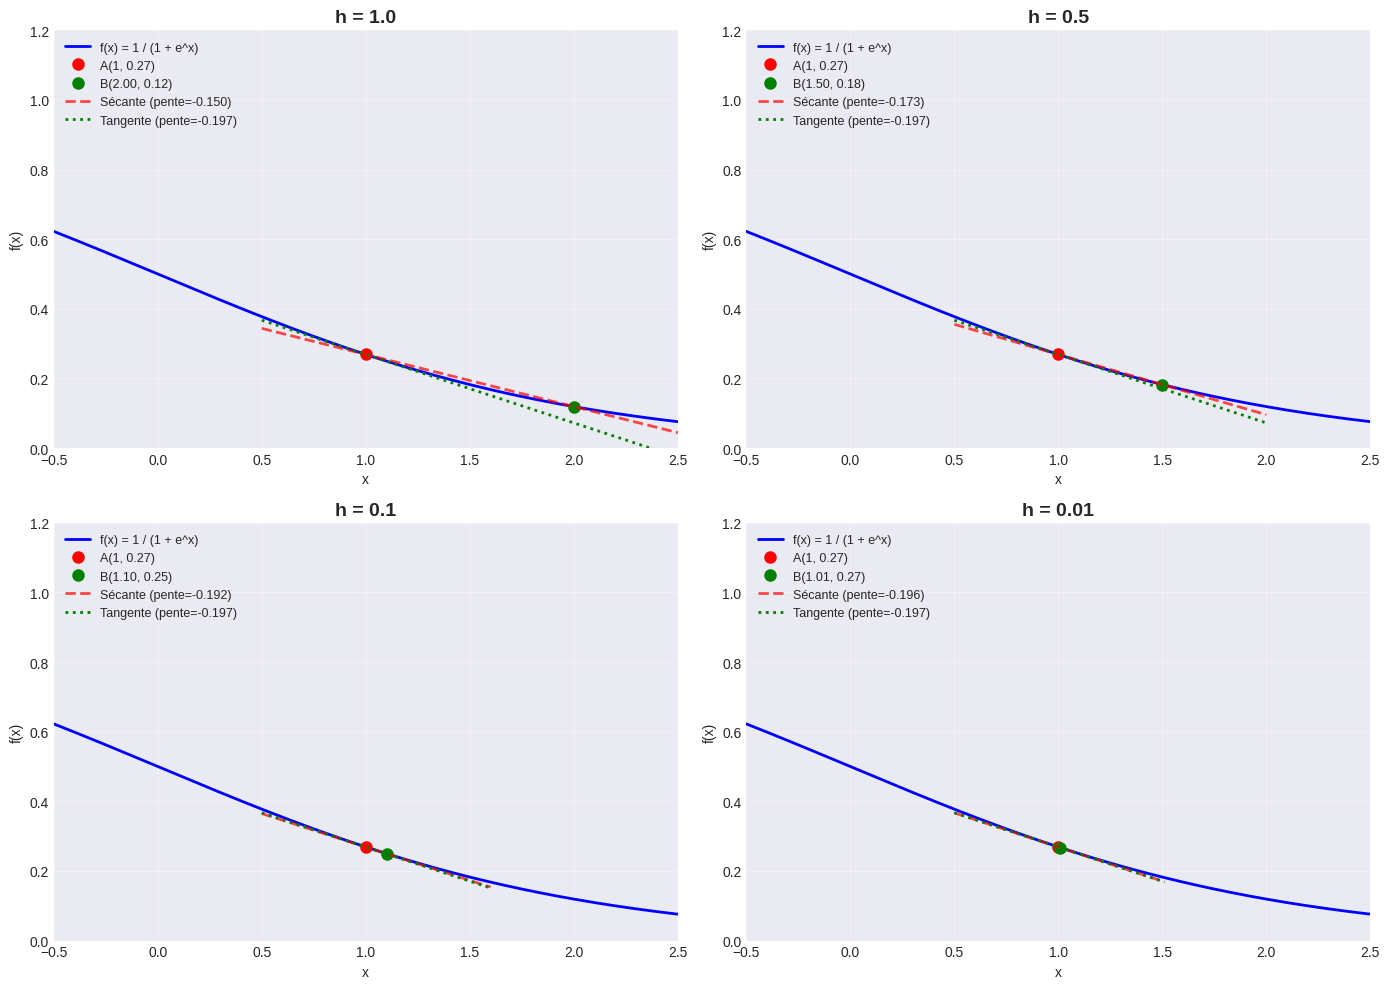

In [ ]:
# Visualisation du passage de la sécante à la tangente def f(x):
# Pour cet exercice, on laisse le code de plot mais on demande de définir f et df
# TODO: Définir la fonction f(x) = 1 / (1 + e^x)  return ...
def f(x):
    return 1 / (1 + np.exp(x))
# TODO: Définir la dérivée f'(x)
def df(x):
    return -np.exp(x) / (1 + np.exp(x))**2
a = 1
# Point où on calcule la dérivée
x = np.linspace(-0.5, 2.5, 400)
# ensemble de départ
fig, axes = plt.subplots(2,2, figsize=(14, 10))
# h décroissant
# TODO: Définir une liste de valeurs de h décroissantes (ex: [1.0, 0.5, 0.1, 0.01])
h_values = [1.0, 0.5, 0.1, 0.01]
# ... (Le reste du code de visualisation sera à compléter par l'étudiant ou laissé tel quel si c'est juste la définition qui compte)
# Tracer les sécantes
for idx, h in enumerate(h_values):
    ax = axes[idx//2, idx%2]

    ax.plot(x, f(x), 'b-', linewidth=2, label='f(x) = 1 / (1 + e^x)')

    # Points A et B
    ax.plot([a], [f(a)], 'ro', markersize=8, label=f'A({a}, {f(a):.2f})')
    ax.plot([a+h], [f(a+h)], 'go', markersize=8, label=f'B({a+h:.2f}, {f(a+h):.2f})')

    # Sécante
    slope_sec = (f(a+h) - f(a)) / h
    x_line = np.array([a-0.5, a+h+0.5])
    y_sec = f(a) + slope_sec * (x_line - a)
    ax.plot(x_line, y_sec, 'r--', linewidth=2, alpha=0.7, label=f'Sécante (pente={slope_sec:.3f})')

    # Tangente vraie
    slope_tan = df(a)
    y_tan = f(a) + slope_tan * (x_line - a)
    ax.plot(x_line, y_tan, 'g:', linewidth=2, label=f'Tangente (pente={slope_tan:.3f})')

    # Titres et labels
    ax.set_title(f'h = {h}', fontsize=14, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=9)
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(0, 1.2)

plt.tight_layout()
plt.show()

## 2. Calcul de Dérivées par Définition

In [ ]:
# Calcul numérique de la dérivée par la définition
def numerical_derivative(f, x, h=1e-5):
    """Approximation de f'(x) par (f(x+h)-f(x))/h"""
    # TODO: Implémenter la formule du taux d'accroissement
    return (f(x + h) - f(x)) / h
# Test sur différentes fonctions
print("Calcul numérique des dérivées:\n")
print("="*60)
# 1. f(x) = 1 / (1 + e^x)
f1 = lambda x: 1/(1 + np.exp(x))
print(f"f(x) = 1/(1 + e^x) en x=1: {numerical_derivative(f1, 1):.6f} (Théorique: 2.0)")

Calcul numérique des dérivées:

f(x) = 1/(1 + e^x) en x=1: -0.196611 (Théorique: 2.0)


## 3. Règles de Dérivation

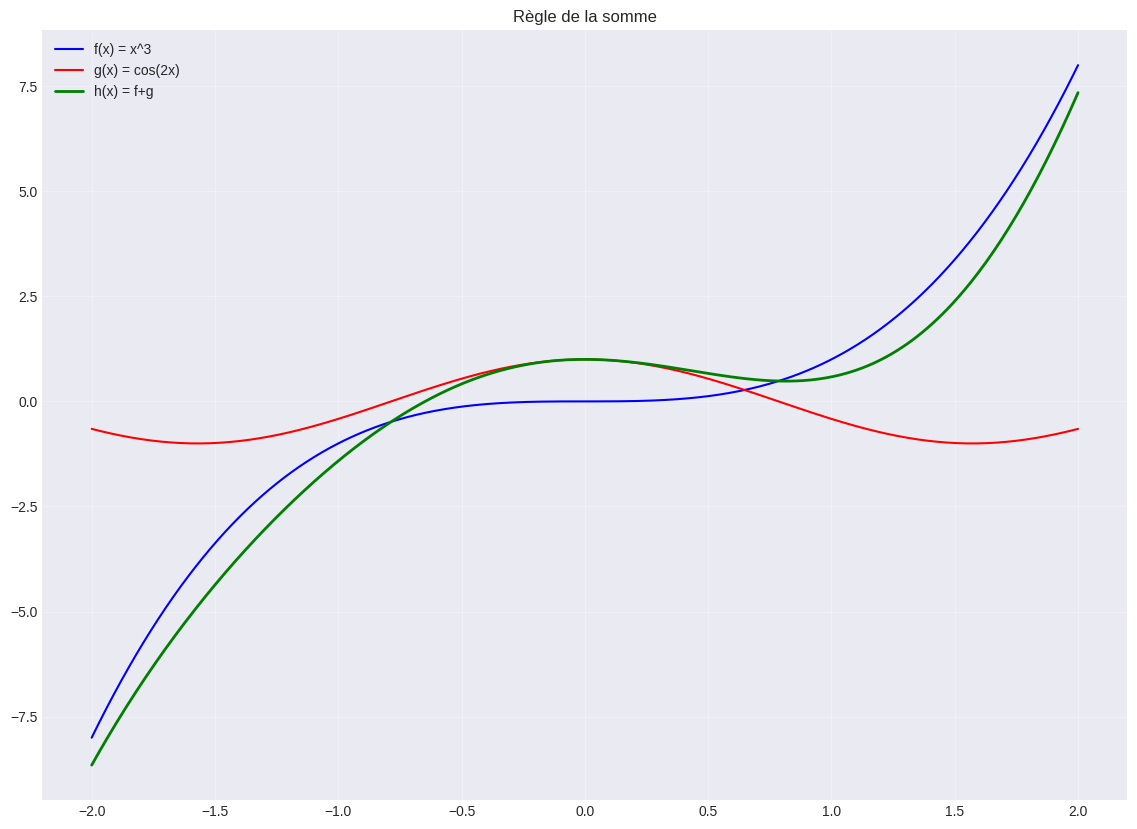

In [ ]:
# Illustration des règles de dérivation
x = np.linspace(-2, 2, 400)
fig, ax = plt.subplots(1, figsize=(14, 10))
# 1. Règle de la somme: (f+g)' = f' + g'
# TODO: Définir f(x) = x^3 et g(x) = cos(2x)
f = lambda x: x**3
g = lambda x: np.cos(2*x)
h = f(x) + g(x)
# TODO: Définir les dérivées df et dg
df = lambda x: 3*x**2
dg = lambda x: -2*np.sin(2*x)
dh = lambda x: df(x) + dg(x)
# Tracer f, g et h sur le meme graphe

ax.plot(x, f(x), 'b-', label="f(x) = x^3")
ax.plot(x, g(x), 'r-', label="g(x) = cos(2x)")
ax.plot(x, h, 'g-', linewidth=2, label="h(x) = f+g")
ax.set_title("Règle de la somme")
ax.grid(True, alpha=0.3)
ax.legend()

## 4. Test de la Dérivée Seconde

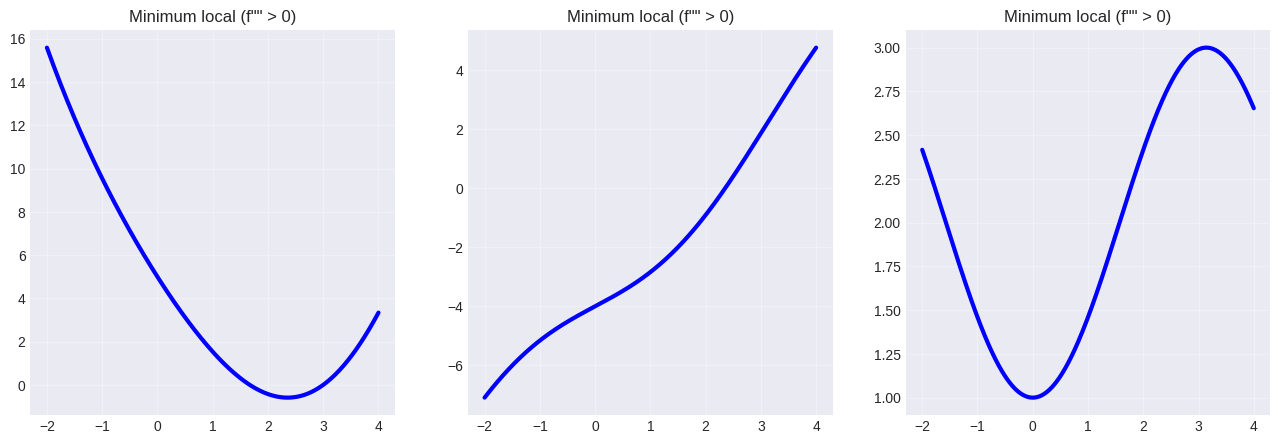

In [ ]:
# Test de la dérivée seconde pour classifier les extrema
x = np.linspace(-2, 4, 400)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Minimum (f'' > 0)
f1 = lambda x: (x - 2)**2 + np.cos(x)
df1 = lambda x: 2*(x - 2) - np.sin(x)
d2f1 = lambda x: 2 - np.cos(x)

# Graphe du minimum
axes[0].plot(x, f1(x), 'b-', linewidth=3)
axes[0].set_title('Minimum local (f"" > 0)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(x, df1(x), 'b-', linewidth=3)
axes[1].set_title('Minimum local (f"" > 0)')
axes[1].grid(True, alpha=0.3)

axes[2].plot(x, d2f1(x), 'b-', linewidth=3)
axes[2].set_title('Minimum local (f"" > 0)')
axes[2].grid(True, alpha=0.3)